In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer churn prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first=True , dtype = 'int')
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
x_train_scale

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(3 , activation = 'sigmoid' , input_dim = 11))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam')

In [ ]:
model.fit(x_train_scale , y_train , epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5289
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4968
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4713
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4718
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4504
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4499
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4371
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4413
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4332
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4300


In [ ]:
model.layers[0].get_weights()

[array([[-0.2165208 ,  0.09977263,  0.41400036],
        [-0.5550622 , -1.7005321 , -1.6142017 ],
        [-0.13689578,  0.20623769,  0.14679073],
        [-0.2214074 , -0.11046933, -0.2004149 ],
        [ 0.08752794,  0.75011355, -0.15815203],
        [-0.05992182, -0.06061978,  0.15746205],
        [ 0.991513  ,  0.23852189,  0.38830483],
        [-0.04668292, -0.07813778,  0.07697856],
        [-0.9911187 , -0.24655782, -0.17480023],
        [-0.16369449, -0.06779578,  0.1664631 ],
        [ 0.49660757,  0.48136416,  0.23561908]], dtype=float32),
 array([0.10692645, 0.26748115, 0.05129084], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[-1.3327149],
        [-0.8989862],
        [-1.0959944]], dtype=float32),
 array([0.1559449], dtype=float32)]

In [ ]:
y_log = model.predict(x_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred = np.where(y_log > 0.8 , 1 , 0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8035

In [ ]:
# we can impove the output by putting some changes in the neural network
# 1. epochs 10 lie h hmne isme uske badle 100 ya 1000 bhi lete h kitne bhi le skte h better improvement k lie taki loss value km ae
# 2. hidden layers ka activation function sigmoid lia h uski jagah relu le skte h vo better perform krta h
# 3. hidden layers ka number of nodes bhada skte h like 10 , 20 jese hmne 3 lia h
# 4. number of hidden layers bhada skte h jese isme sirf 1 hi h

In [ ]:
model1 = Sequential()
model1.add(Dense(11 , activation = 'relu' , input_dim = 11))
model1.add(Dense(11 , activation = 'relu'))
model1.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [ ]:
history = model1.fit(x_train_scale , y_train , epochs = 100 , validation_split = 0.2) # validation split isilie lia kuki apne p 8000 customers ka data h is se 8000 customers m bhi 20% customer ko split kr rhe h ab model 6000 data p train krke fir 2000 data p test krke accuracy sath m btaega un 2000 data set p

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7799 - loss: 0.5305 - val_accuracy: 0.7994 - val_loss: 0.4587
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4610 - val_accuracy: 0.8019 - val_loss: 0.4424
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8070 - loss: 0.4332 - val_accuracy: 0.8069 - val_loss: 0.4366
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4390 - val_accuracy: 0.8087 - val_loss: 0.4313
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4317 - val_accuracy: 0.8150 - val_loss: 0.4268
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4197 - val_accuracy: 0.8200 - val_loss: 0.4209
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8236 - loss: 0.4204 - val_accuracy: 0.8231 - val_loss: 0.4144
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8249 - loss: 0.4158 - val_accu

In [ ]:
 model1.layers[0].get_weights()

[array([[ 3.84397693e-02, -6.84009790e-02, -1.21585086e-01,
          1.63527682e-01,  7.79463202e-02,  4.76406291e-02,
          1.69437215e-01, -1.25562504e-01,  2.69867659e-01,
          7.71961957e-02, -3.81970853e-01],
        [ 3.08326960e-01, -2.35082299e-01, -2.02204302e-01,
          9.61636305e-02, -7.25049138e-01, -1.17832550e-03,
          5.84670544e-01,  1.13451302e+00, -8.36321652e-01,
          5.36519364e-02, -7.29322970e-01],
        [ 1.57709360e-01,  9.50603485e-02, -3.66845816e-01,
          2.17646405e-01, -5.13568744e-02, -3.53891291e-02,
         -2.55378306e-01, -2.81081758e-02,  3.39019820e-02,
         -1.55694969e-02, -4.46544662e-02],
        [ 1.56171247e-01, -7.02270210e-01, -2.34417200e-01,
         -5.02970397e-01,  3.19816694e-02, -3.75487864e-01,
         -1.73380733e-01,  4.60535847e-02, -7.51685053e-02,
          7.00888783e-02, -6.61301911e-02],
        [-2.88169216e-02, -4.98570874e-02, -3.02221030e-01,
         -3.42584789e-01, -3.75212170e-02, -

In [ ]:
model1.layers[1].get_weights()

[array([[ 0.2280965 ,  0.23662221, -0.26835823, -0.4610752 , -0.3557876 ,
          0.6259938 , -0.5064678 ,  0.5314994 ,  0.39524892,  0.23998061,
          0.16945454],
        [-0.06297267,  0.2648394 , -0.30816597,  0.23787163, -0.38598245,
          0.67610866, -0.23838696, -0.25687873, -0.09158223,  0.16918622,
          0.49508518],
        [ 0.47321805, -0.1469868 , -0.41489756, -0.17948003,  0.1146368 ,
          0.6435375 , -0.03600066,  0.29469633, -0.23199195,  0.05143555,
          0.14197055],
        [ 0.5245293 ,  0.24560553, -0.27126455, -0.03741054, -0.07754503,
          0.2631088 , -0.1041135 , -0.5587817 , -0.38888556,  0.21862876,
         -0.03440904],
        [ 0.44669843, -0.2354388 , -0.39169338, -0.00949236, -0.29913175,
         -0.32469207, -0.74879575, -1.1174049 , -0.54891866, -0.0361224 ,
          0.2744161 ],
        [-0.49067602,  1.0874689 , -0.04020926,  0.02300889,  0.24613225,
         -0.6451586 ,  0.13033693,  0.8299117 ,  0.18131956, -0.6618358

In [ ]:
model1.layers[2].get_weights()

[array([[-0.77438986],
        [ 0.9978498 ],
        [ 0.6659189 ],
        [-1.0100231 ],
        [-0.9559975 ],
        [-1.1101735 ],
        [ 2.0966349 ],
        [ 1.0140061 ],
        [ 1.0120159 ],
        [-0.7460957 ],
        [-0.5022276 ]], dtype=float32),
 array([0.05097041], dtype=float32)]

In [ ]:
y_log = model1.predict(x_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred = np.where(y_log > 0.5 , 1 , 0)

In [ ]:
accuracy_score(y_test , y_pred)

0.856

In [ ]:
history.history

{'accuracy': [0.7878124713897705,
  0.796093761920929,
  0.7990624904632568,
  0.8035937547683716,
  0.80859375,
  0.8149999976158142,
  0.8224999904632568,
  0.828125,
  0.8326562643051147,
  0.8373437523841858,
  0.8396875262260437,
  0.8443750143051147,
  0.8473437428474426,
  0.8487499952316284,
  0.8526562452316284,
  0.8540624976158142,
  0.8575000166893005,
  0.8575000166893005,
  0.8603125214576721,
  0.8598437309265137,
  0.8607812523841858,
  0.8614062666893005,
  0.8584374785423279,
  0.8629687428474426,
  0.8628125190734863,
  0.8629687428474426,
  0.864062488079071,
  0.8631250262260437,
  0.8629687428474426,
  0.8618749976158142,
  0.8626562356948853,
  0.8617187738418579,
  0.86328125,
  0.8637499809265137,
  0.8610937595367432,
  0.8637499809265137,
  0.8621875047683716,
  0.8628125190734863,
  0.8643749952316284,
  0.8629687428474426,
  0.8646875023841858,
  0.8617187738418579,
  0.86328125,
  0.8634374737739563,
  0.8656250238418579,
  0.8634374737739563,
  0.86328125

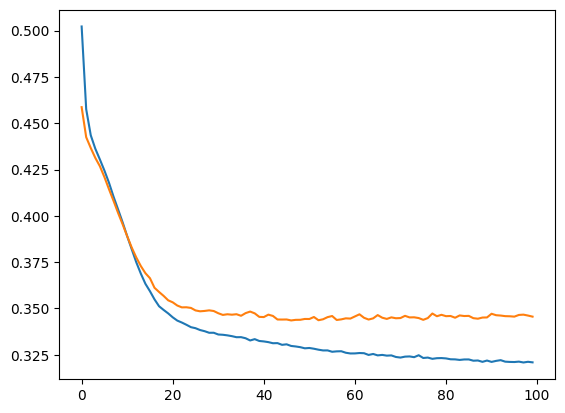

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

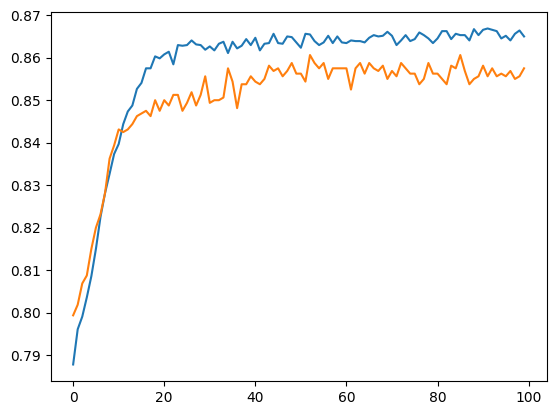

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()